<a href="https://colab.research.google.com/github/PauloSanchez/Data_science_UL/blob/main/Proyecto_1_parte_3_Paulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis exploratorio

In [30]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales_predictions.csv')
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
#Analisis exploratorio para saber si hay datos Nan y los tipos de datos que tenemos en cada columna.
df.info()
#Como se observa la columna item weight y Outlet_Size tienen NaN, por lo que debemos revisar cuale y cuantos son y de que manera procedemos a completar o eliminar de la data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [32]:
#Definiremos aquellos que son nulos y los que no, para ver que correlación hay con otras columnas del DF.
nulos=df[df.Outlet_Size.isnull()]
nulos




,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [33]:
nulos.groupby(['Outlet_Identifier'])[['Outlet_Size']].count()
#Se observan que solo tres sucursales no tienen el dato.

,Outlet_Size
Outlet_Identifier,
OUT010,0
OUT017,0
OUT045,0


In [34]:
#Identificar los que no son nulos, filtrando
nonulos=df[df.Outlet_Size.notnull()]
nonulos


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [35]:
nonulos.groupby(['Outlet_Size','Outlet_Identifier'])[['Outlet_Size']].count()

Outlet_Size
Outlet_Size Outlet_Identifier             
High        OUT013                     932
Medium      OUT018                     928
            OUT027                     935
            OUT049                     930
Small       OUT019                     528
            OUT035                     930
            OUT046                     930

La columna Outlet_Size, tiene NaN pero es por que hay tres sucursales de outlet cuyo Outlet_Identifier, no reportan en ninguna fila un valor para la columna mencionada inicialmente, por lo que se determina dejar en blanco y no utilizar el tamaño sino, más bien el identificador de la sucursal.

In [36]:
#Se procede a explorar la columna de numeros enteros denominada "Item_Weight", para determinar que se hará con los datos.

weightnull=df[df.Item_Weight.isnull()]
weightnull

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [37]:
#Se procede a explorar la columna de numeros enteros denominada "Item_Weight", para determinar que se hará con los datos.

weightnotnull=df[df.Item_Weight.notnull()]
weightnotnull.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
filtroitem=df['Item_Identifier']=='DRI11'
filtroitem
df1=df.loc[filtroitem, :]
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
1366,DRI11,NaN,Low Fat,0.060237,Hard Drinks,115.9834,OUT019,1985,Small,Tier 1,Grocery Store,345.5502
3127,DRI11,8.26,Low Fat,0.034458,Hard Drinks,113.3834,OUT049,1999,Medium,Tier 1,Supermarket Type1,2073.3012
5310,DRI11,8.26,Low Fat,0.057586,Hard Drinks,113.7834,OUT010,1998,NaN,Tier 3,Grocery Store,115.1834
7022,DRI11,8.26,Low Fat,0.034398,Hard Drinks,115.7834,OUT035,2004,Small,Tier 2,Supermarket Type1,2073.3012
7192,DRI11,8.26,Low Fat,0.034544,Hard Drinks,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,1267.0174
8483,DRI11,8.26,Low Fat,0.034474,Hard Drinks,117.0834,OUT045,2002,NaN,Tier 2,Supermarket Type1,1612.5676


Se aprecia que al filtrar un Item_identifier, el peso del item es el mismo dado que el identifier es el codigo del producto y el peso obviamente es el mismo, por lo que con el promedio de estos excluyendo los nulos podré obtener el valor a reemplazar.

#Reemplazar Nulos

In [39]:
weightnotnull.groupby(['Item_Identifier'])[['Item_Weight']].mean()


,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


Creamos un groupby con la media para obtener el valor a reemplazar en los null

In [40]:
df11=df

In [41]:
#Función para rellenar NaN con un groupby en pandas

def rellenar_nan(x):
  ids = set(x.dropna())
  if not ids:
    # Conjunto vacío, nada que hacer
    print(x.name, "era todo NaN")
    return x
  if len(ids)>1:
    # Posible problema si además contiene Nan
    if sum(x.isnull()) > 0:
      print("Cuidado!", x.name, "tiene varias posibilidades", ids)
  # Extraemos uno de los elementos del conjunto y lo usamos para rellenar  
  id = ids.pop()
  return x.fillna(id)

Aplicamos la función para que podamos reemplazar con pandas y un groupby los datos nulos

In [42]:
df11.loc[:, "Item_Weight"] = \
   df11.groupby("Item_Identifier")["Item_Weight"].apply(rellenar_nan)

FDE52 era todo NaN
FDK57 era todo NaN
FDN52 era todo NaN
FDQ60 era todo NaN


In [43]:
df11.loc[:, "Outlet_Size"] = \
   df11.groupby("Outlet_Identifier")["Outlet_Size"].apply(rellenar_nan)

OUT010 era todo NaN
OUT017 era todo NaN
OUT045 era todo NaN


Una vez aplicada la función, nos dirá cuales erán los Item Identifier que no tenian en ninguna fila un dato, mismo para el codigo de outlet. y en el caso de outlet_size todas las filas para el mismo codigo de outlet estaban vacías o con datos nulos.

In [44]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Al parecer son muchas filas que tienen datos nulos para el outlet_size, verificaremos cuanto representa en el total de la data.

In [45]:
#Porcentajes de NaN restantes en Item_Weight
# import numpy as np
Completo=df11['Item_Identifier'].count()

NaN=df11['Item_Weight'].isnull().sum(axis=0) # Cuenta los datos NaN en la columna.

#Entonces el porcentaje es:

Percent=NaN/Completo
p=Percent*100
print('El total de NaN dentro del DataFrame representa el',p,'%')


El total de NaN dentro del DataFrame representa el 0.04693183151472486 %


Se observa que no se pueden eliminar todos los nulos puesto que hay 4 filas que no se rellenan, dado que todo era NaN, por lo que al mirar que los NaN solo representan el 0.05% aprox, se define eliminar de la data esas filas, pues no hay como rellenarlas. Por ultimo debemos hacer lo mismo para la columna Outlet_Size.

In [46]:
#Porcentajes de NaN restantes en Outlet_Size
import numpy as np
Completo1=df11['Item_Identifier'].count()

NaN1=df11['Outlet_Size'].isnull().sum(axis=0) # Cuenta los datos NaN en la columna.

#Entonces el porcentaje es:

Percent1=NaN1/Completo1
p1=Percent1*100
print('El total de NaN dentro del DataFrame representa el',p1,'%')

El total de NaN dentro del DataFrame representa el 28.27642848762173 %


In [47]:
#Rellenar una columna con NaN al valor 'No definido'

values = {"Outlet_Size": 'No definido'} #Se debe crear un diccionario para reemplazar en la columna
df11=df11.fillna(value=values)
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Se relleno todos los tamaños de outlet por la frase 'No definido' dado que no tenemos otros Outlet_Identifier de donde obtener la data y la cantidad de filas supera el 10% del total.

In [48]:
#Eliminar las 4 filas restantes con NaN

df11=df11.dropna()
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


Con esto se termina de limpiar y ordenar la base de datos!!

#Visualizaciones

In [49]:
df11.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No definido,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [50]:
#Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt

In [51]:
datagroup1=df.groupby(['Outlet_Identifier'])['Item_Identifier'].count()
x=np.array(datagroup1.index)
y=np.array(datagroup1.values)


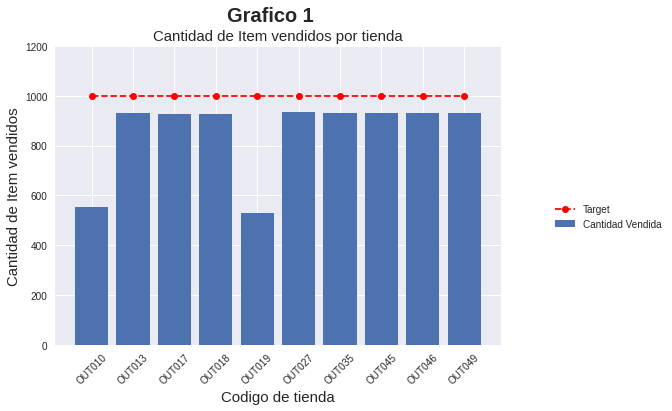

In [52]:
#Graficamos
plt.suptitle("Grafico 1", fontsize=20, fontweight="bold")
plt.style.use('seaborn')
plt.bar(x,y)
plt.xticks(rotation=45)
plt.title('Cantidad de Item vendidos por tienda', fontsize=15)
plt.xlabel('Codigo de tienda',fontsize=15)
plt.ylabel('Cantidad de Item vendidos', fontsize=15)
plt.ylim(0,1200)
plt.plot([1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,], 'r--o')
plt.legend(['Target','Cantidad Vendida'],bbox_to_anchor=(1.1,0.5))

Podemos observar que del total de las sucursales, la mayoría supera los 800 item vendidos, salvo dos de ellos que a penas superan los 500.

Además agregué un Target de ventas como linea roja segmentada.

In [53]:
datagroup2=df11.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum()
a=np.array(datagroup2.index)
b=np.array(datagroup2.values)

(0.0, 3600000.0)

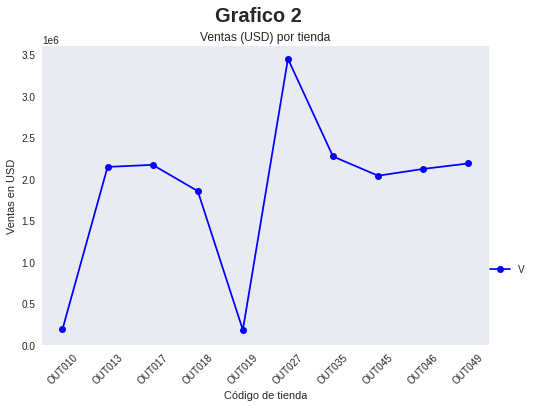

In [54]:
plt.style.use('seaborn')
plt.suptitle("Grafico 2", fontsize=20, fontweight="bold")
plt.title('Ventas (USD) por tienda')
plt.xlabel('Código de tienda')
plt.ylabel('Ventas en USD')
plt.grid(False)
plt.plot(a,b, 'b-o')
plt.xticks(rotation=45)
plt.legend('Ventas', bbox_to_anchor=(1.1,0.3))
plt.ylim(0,3600000)

In [61]:
datagroup3=df11.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()
c=np.array(datagroup3.index)
d=np.array(datagroup3.values)

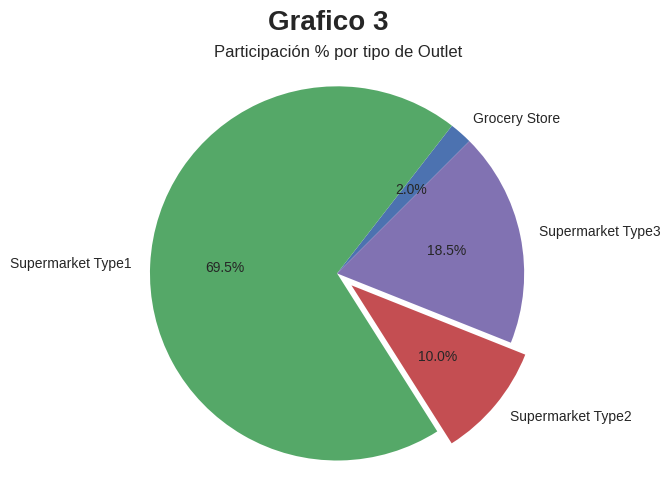

In [79]:
#Gráfico de torta

explotar = [0, 0, 0.1, 0] #sirve para destacar alguna porcion. El valor es cuanto se separa de la torta.

fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1) 
plt.suptitle("Grafico 3", fontsize=20, fontweight="bold")
ax1.pie(d, labels=c, explode=explotar, autopct="%.1f%%", shadow = False, startangle=45)
# autopct = porcentaje automático; shadow = grafico con sombra; startangle = ángulo de inicio
# %.2f%% formato de decimal, viene del lenguaje C. Sí, python está escrito en C.
plt.title('Participación % por tipo de Outlet')
ax1.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)

plt.show()